In [59]:
import pandas as pd
import os

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../DATASETS/CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name
    label = os.path.basename(file)
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter out data associated with the label 'SWAD.N0000'
combined_df = combined_df[combined_df['Label'] != 'SWAD.N0000']

# Select the columns 'Label', 'Trade Date', and 'Close (Rs.)'
selected_columns = ['Label', 'Trade Date', 'Close (Rs.)']
result_df = combined_df[selected_columns]

# Sort the DataFrame by 'Label' and 'Trade Date'
result_df = result_df.sort_values(by=['Label', 'Trade Date'])

print(result_df)

# Group by 'Label' and aggregate to get the start, middle, and last date
agg_functions = {
    'Trade Date': ['first', lambda x: x.iloc[len(x) // 2], 'last']
}
result_df = result_df.groupby('Label').agg(agg_functions)

# Rename the columns
result_df.columns = ['Start Date', 'Middle Date', 'Last Date']

# Reset the index to make 'Label' a regular column
result_df = result_df.reset_index()

# Display the resulting DataFrame
print(result_df)


                 Label Trade Date  Close (Rs.)
135378   AAF.N0000.csv   10/10/23        13.80
135377   AAF.N0000.csv   10/11/23        13.50
135376   AAF.N0000.csv   10/12/23        13.70
135375   AAF.N0000.csv   10/13/23        13.80
135383   AAF.N0000.csv    10/3/23        13.30
...                ...        ...          ...
132596  YORK.N0000.csv    9/26/23       153.00
132608  YORK.N0000.csv     9/4/23       151.75
132607  YORK.N0000.csv     9/5/23       152.00
132606  YORK.N0000.csv     9/6/23       152.00
132605  YORK.N0000.csv     9/8/23       152.00

[630060 rows x 3 columns]
              Label Start Date Middle Date Last Date
0     AAF.N0000.csv   10/10/23     8/22/23    9/8/23
1     AAF.R0000.csv    10/1/14      3/5/19   9/30/14
2    AAIC.N0000.csv    1/10/01      4/1/10    9/9/22
3    ABAN.N0000.csv   10/10/23     8/24/23    9/8/23
4     ABL.N0000.csv   10/10/23     8/22/23    9/8/23
..              ...        ...         ...       ...
447  VPEL.N0000.csv    1/10/07     4/1

/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_28262/3125474828.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Trade Date'] = result_df['Trade Date'].apply(parse_date)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


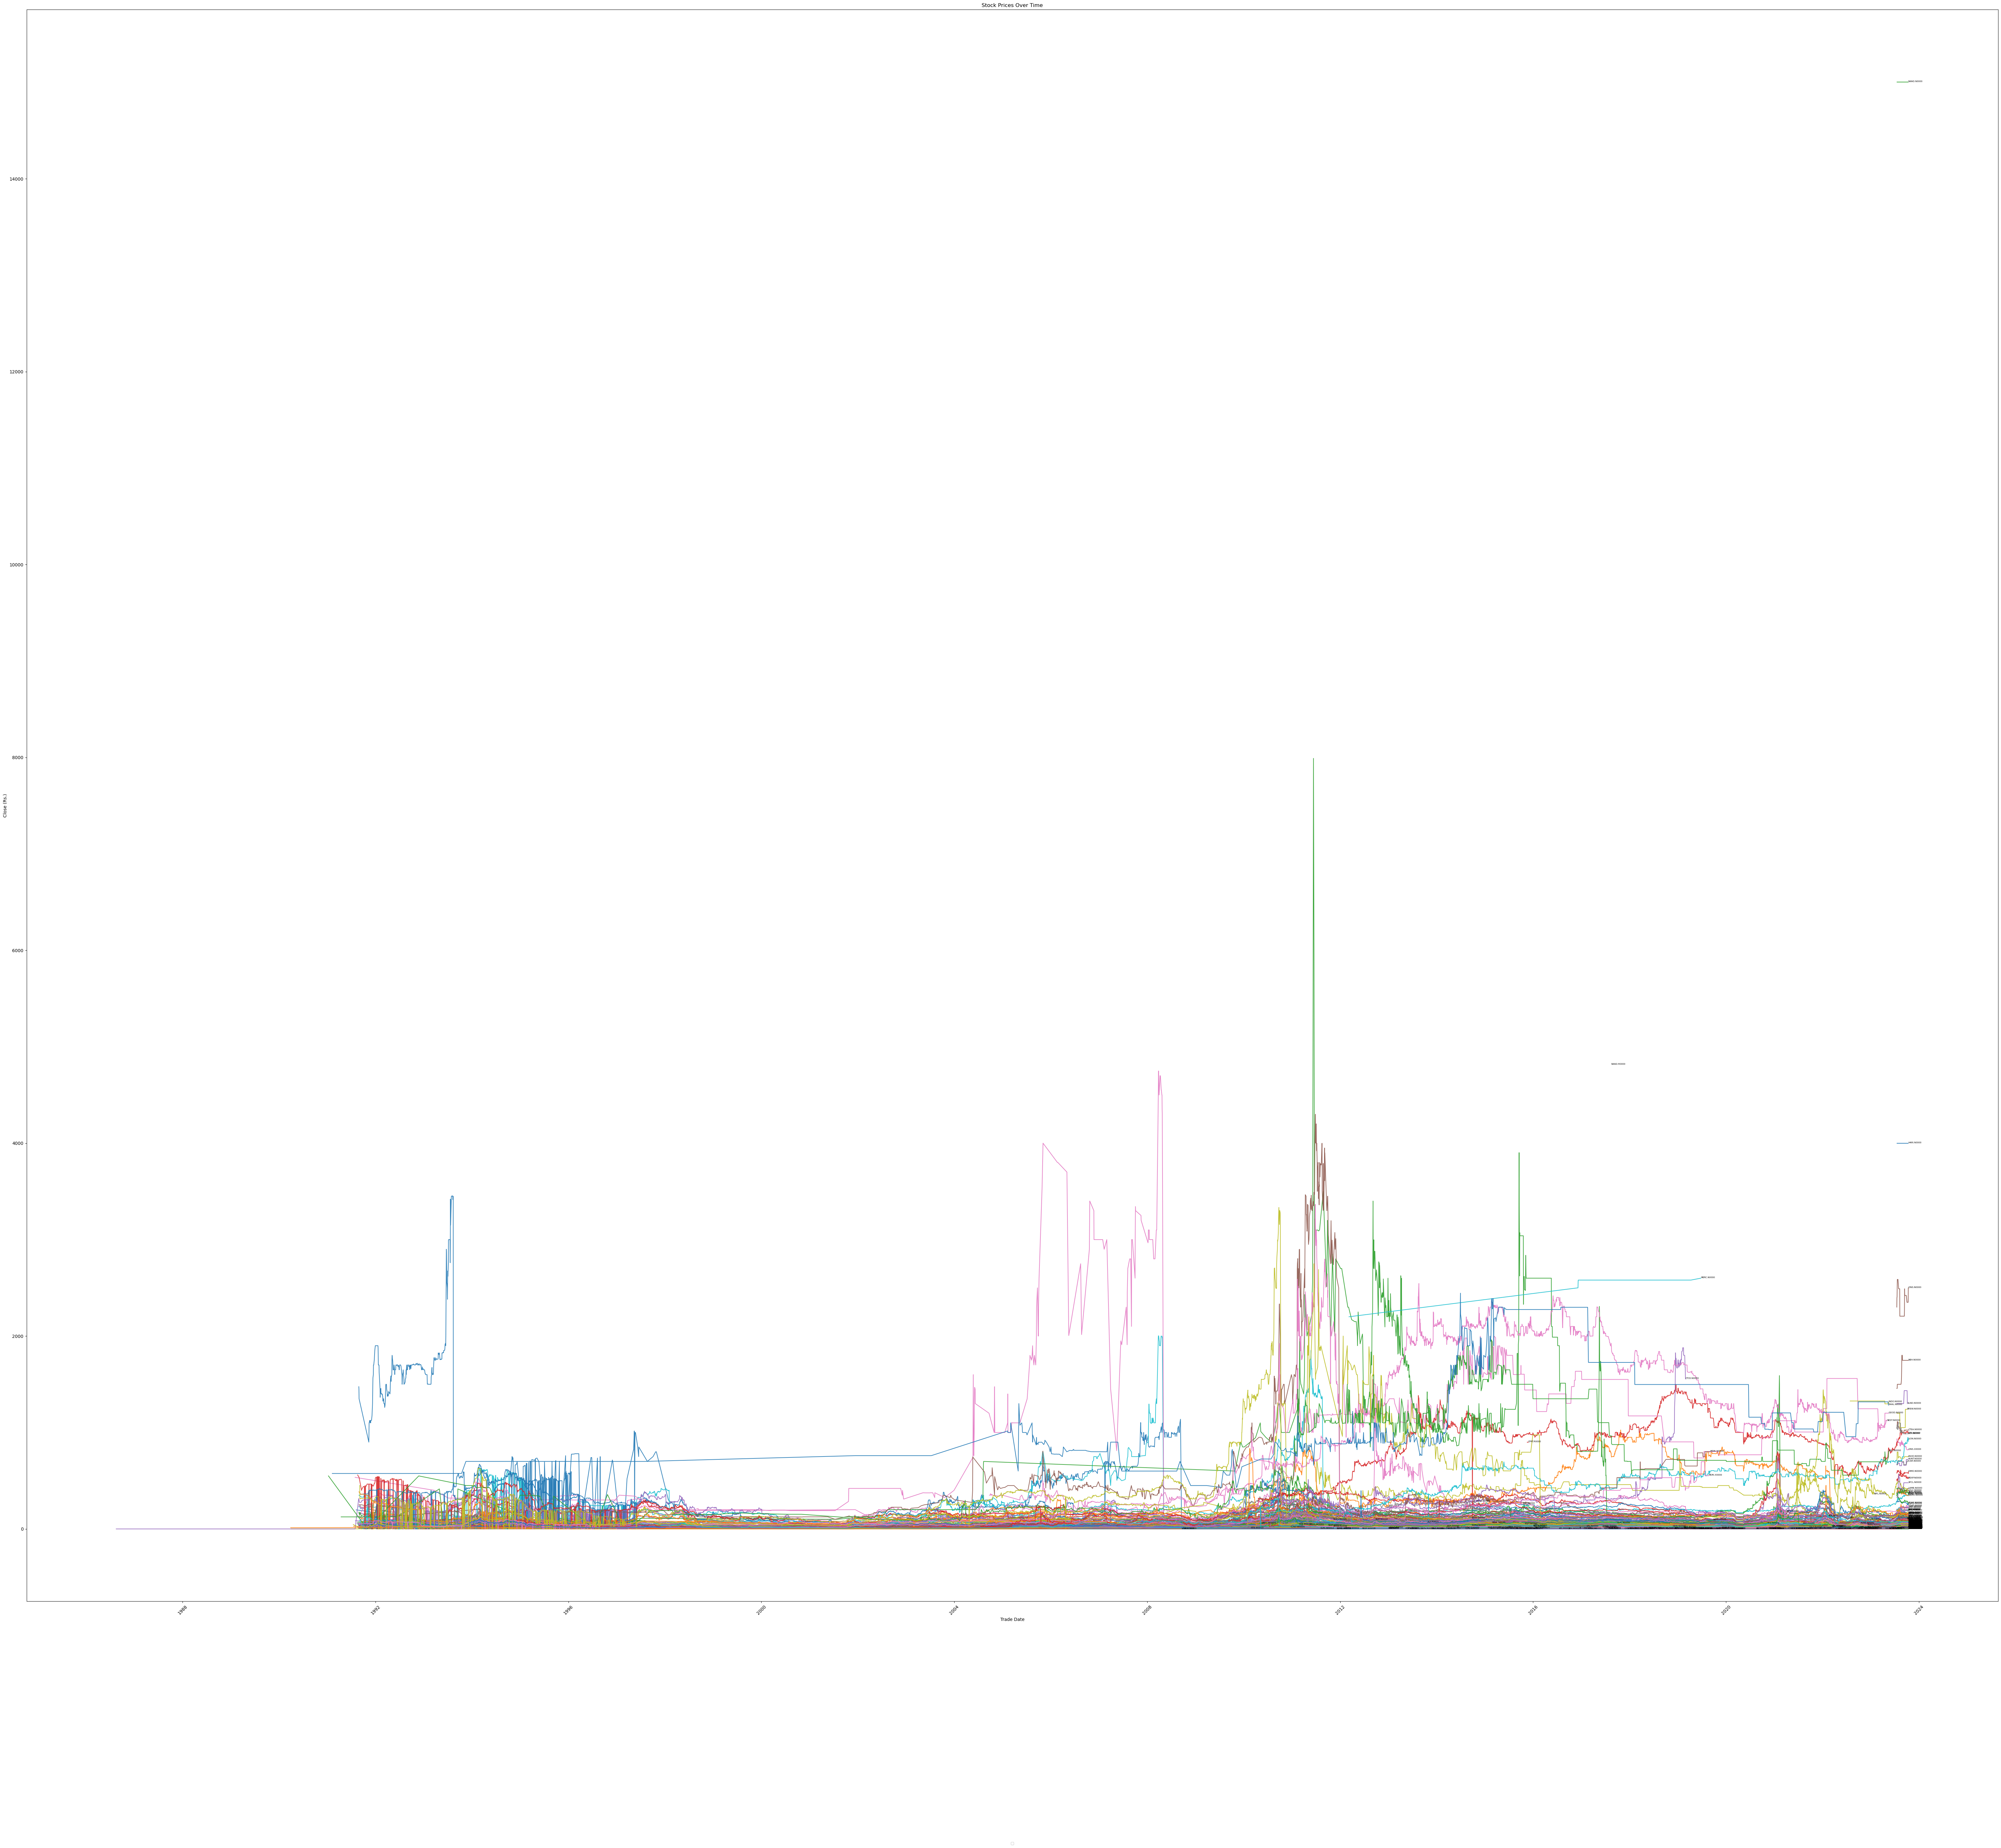

In [60]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from dateutil.parser import parse

# Define a function to attempt to parse the date
def parse_date(date_str):
    try:
        return parse(date_str)
    except ValueError:
        return None

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../DATASETS/CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the ".csv" extension
    label = os.path.basename(file).replace(".csv", "")
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Select the columns 'Label', 'Trade Date', and 'Close (Rs.)'
selected_columns = ['Label', 'Trade Date', 'Close (Rs.)']
result_df = combined_df[selected_columns]

# Apply date parsing function to 'Trade Date' column
result_df['Trade Date'] = result_df['Trade Date'].apply(parse_date)

# Drop rows with invalid date values
result_df = result_df.dropna(subset=['Trade Date'])

# Sort the DataFrame by 'Label' and 'Trade Date'
result_df = result_df.sort_values(by=['Label', 'Trade Date'])

# Group the data by 'Label' and aggregate the start date, middle date, and last date
grouped_df = result_df.groupby('Label')['Trade Date'].agg(['first', 'median', 'last'])

# Reset the index of the grouped DataFrame
grouped_df.reset_index(inplace=True)

# Create a larger figure for the plot (adjust the dimensions as needed)
plt.figure(figsize=(80, 65))

# Create a plot with a label for each line and annotate the lines with labels
for label, group in result_df.groupby('Label'):
    plt.plot(group['Trade Date'], group['Close (Rs.)'], label='', alpha=0.9)  # Set alpha for transparency
    plt.text(group['Trade Date'].iloc[-1], group['Close (Rs.)'].iloc[-1], label, fontsize=5)

plt.xlabel('Trade Date')
plt.ylabel('Close (Rs.)')
plt.title('Stock Prices Over Time')

# Set the legend font size to a smaller value
plt.legend(fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # Adjust the parameters as needed

plt.xticks(rotation=45)

# Display the graph with labels on the plotting lines and without ".csv" in label names
plt.show()

/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_28262/523140580.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Trade Date'] = result_df['Trade Date'].apply(parse_date)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


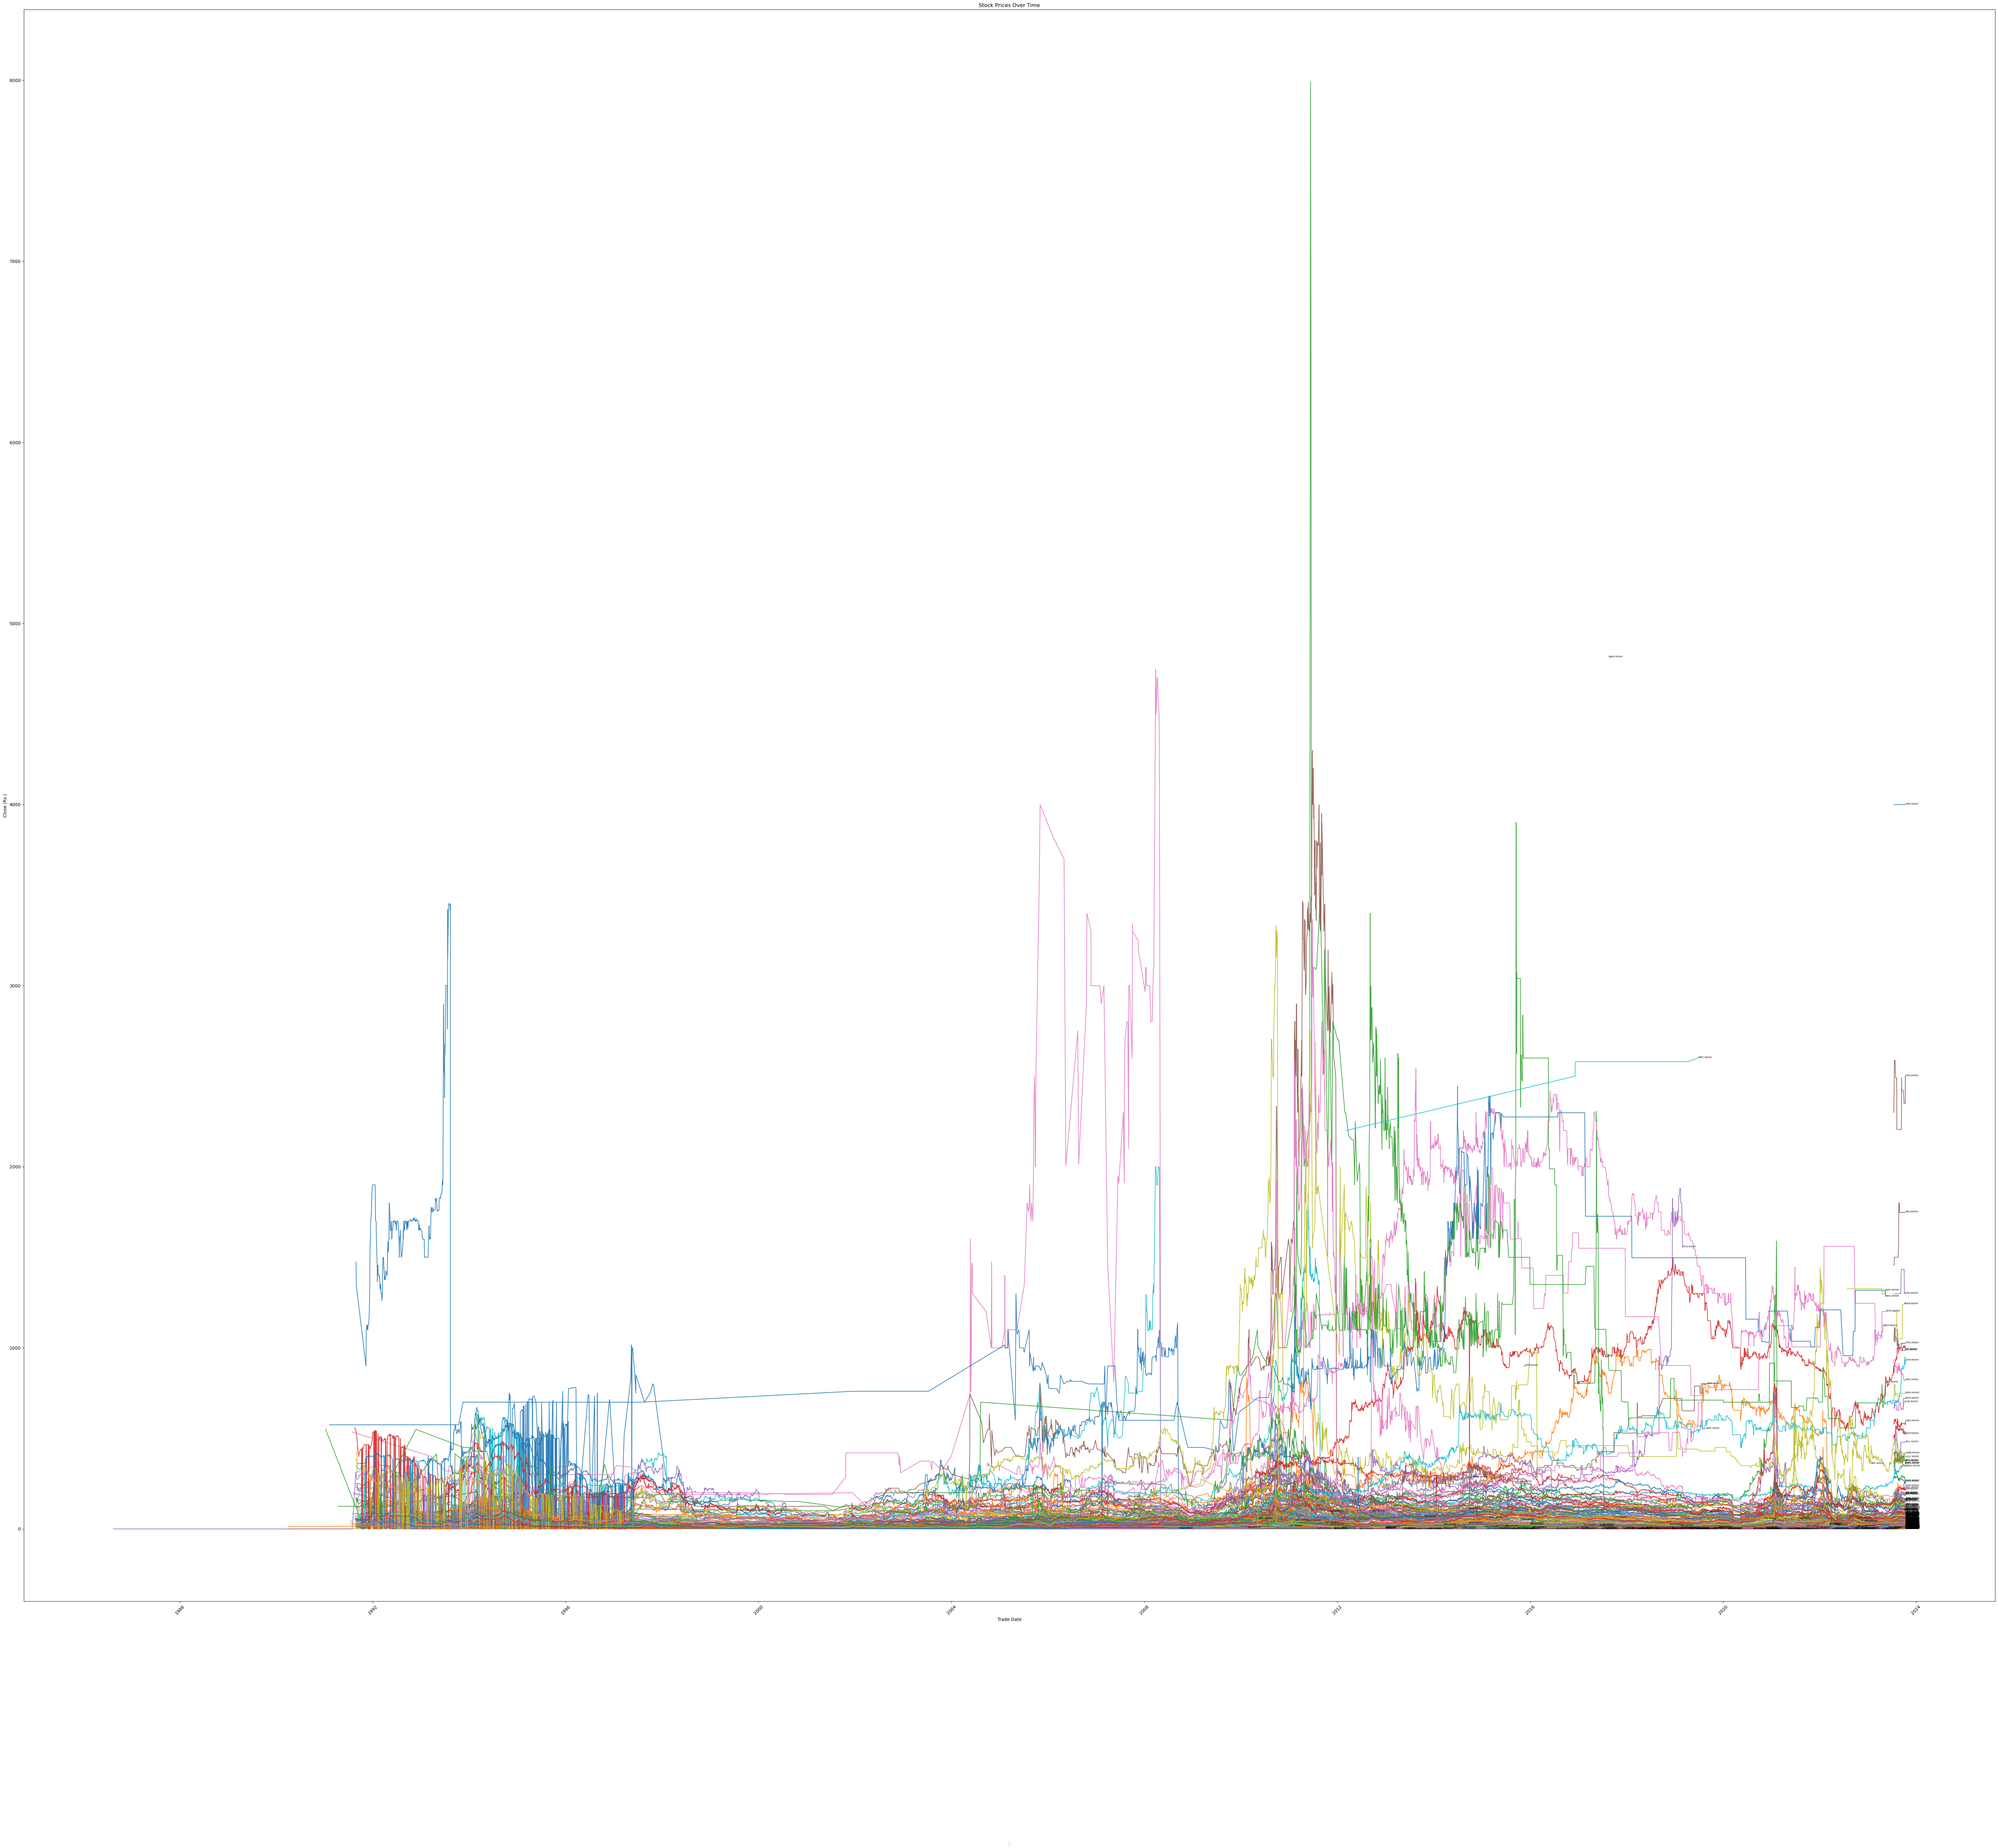

In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from dateutil.parser import parse

# Define a function to attempt to parse the date
def parse_date(date_str):
    try:
        return parse(date_str)
    except ValueError:
        return None

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../DATASETS/CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the ".csv" extension
    label = os.path.basename(file).replace(".csv", "")
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter out data associated with the label 'SWAD.N0000'
combined_df = combined_df[combined_df['Label'] != 'SWAD.N0000']

# Select the columns 'Label', 'Trade Date', and 'Close (Rs.)'
selected_columns = ['Label', 'Trade Date', 'Close (Rs.)']
result_df = combined_df[selected_columns]

# Apply date parsing function to 'Trade Date' column
result_df['Trade Date'] = result_df['Trade Date'].apply(parse_date)

# Drop rows with invalid date values
result_df = result_df.dropna(subset=['Trade Date'])

# Sort the DataFrame by 'Label' and 'Trade Date'
result_df = result_df.sort_values(by=['Label', 'Trade Date'])

# Group the data by 'Label' and aggregate the start date, middle date, and last date
grouped_df = result_df.groupby('Label')['Trade Date'].agg(['first', 'median', 'last'])

# Reset the index of the grouped DataFrame
grouped_df.reset_index(inplace=True)

# Create a larger figure for the plot (adjust the dimensions as needed)
plt.figure(figsize=(80, 65))

# Create a plot with a label for each line and annotate the lines with labels
for label, group in result_df.groupby('Label'):
    plt.plot(group['Trade Date'], group['Close (Rs.)'], label='', alpha=0.9)  # Set alpha for transparency
    plt.text(group['Trade Date'].iloc[-1], group['Close (Rs.)'].iloc[-1], label, fontsize=5)

plt.xlabel('Trade Date')
plt.ylabel('Close (Rs.)')
plt.title('Stock Prices Over Time')

# Set the legend font size to a smaller value
plt.legend(fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # Adjust the parameters as needed

plt.xticks(rotation=45)

# Display the graph with labels on the plotting lines and without ".csv" in label names
plt.show()